# **AMAZON SALE DATA ANALYSIS**

# Data Preprocessing

**Import Python Libraries**

* Pandas - Used for data manipulation and analysis. It also provides features like efficiently storing and manipulating large datasets and not only that it also provides tools for merging, transforming, and cleaning data.
* Numpy - A Python library that provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays
* Matplotlib - This library helps in creating types of visualizations including line plots, scatter plots, bar charts, and histograms.
* Seaborn - This library is used to add enhanced aesthetics and additional plotting functions and it's based on Matplotlib.

In [1]:
#importing Python Libraries

import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as pyplot #data visualization
import seaborn as sns #visualization

data=pd.read_csv("/content/Amazon Sales data.csv",encoding = 'latin-1')

In [2]:
# Display dataframe
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
#get the columns that are present in the dataframe
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
#get the shape of dataframe
data.shape

(100, 14)

In [5]:
#check for nulls in each columns
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
#check for duplicates
data.duplicated().sum()

0

In [7]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
# Changing the data type of different column for model training and analysis
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [9]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [10]:
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [11]:
# Adding extra column to dataframe which contain only month, year and month with year
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')


In [12]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011,2011-07
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011,2011-11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016,2016-06
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015,2015-07


In [13]:
# Display total values of all country
pd.set_option('display.max_rows',None)
data['Country'].value_counts()

Country
The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote

In [14]:
country_names = data['Country'].value_counts().index
country_val = data['Country'].value_counts().values

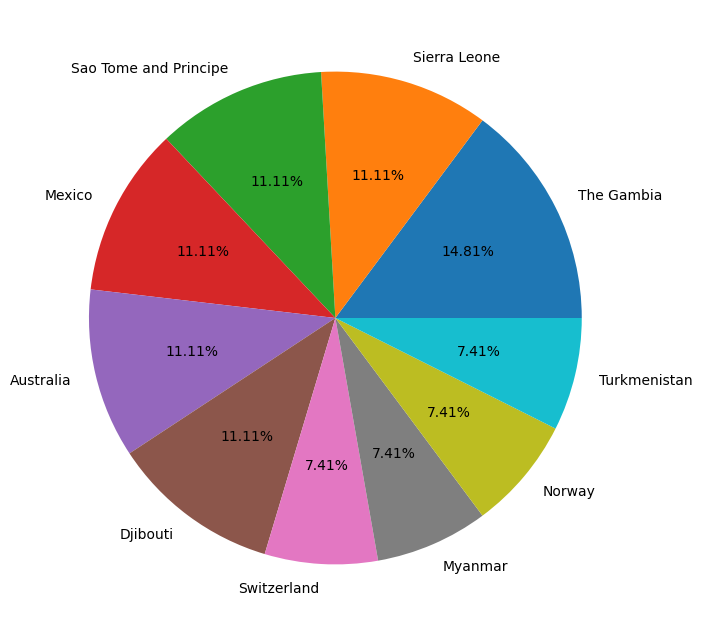

In [15]:
# Pie Chart for top 10 country
fig,ax = pyplot.subplots(figsize=(8,8))
ax.pie(country_val[:10],labels=country_names[:10],autopct='%1.2f%%')
pyplot.show()

# Exploratory Data Analysis

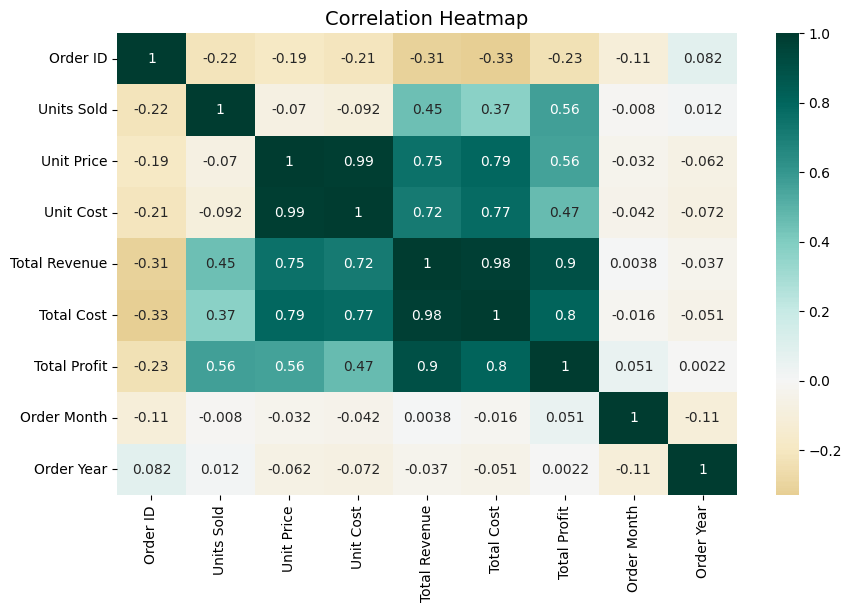

In [16]:
# Checking the correlation
pyplot.figure(figsize = (10,6))
heatmap = sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
pyplot.show()

**Observations:**

* Total Revenue and Total Cost(0.98)- Indicates a strong postive correlation.When Revenue increases, Cost also increases.

* Unit Price and Unit Cost(0.99)- Indicates a high positive correlation,suggesting that they tend to move together.

* Total Profit and Total Revenue(0.9)-Indicates a strong postive correlation. As Revenue and Cost increase, Profit tends to increase as well.

* Unit Sold and Unit Price(-0.07)- Indicates a strong negative correlation. As the number of units sold increases, the unit price tends to decrease, and vice versa.

In [17]:
data['Total Revenue'] = pd.to_numeric(data['Total Revenue'], errors='coerce')
DayRevenue = data.copy()
DayRevenue['Order Date'] = pd.to_datetime(DayRevenue['Order Date']).dt.date

top10Revenue = DayRevenue.groupby('Order Date')['Total Revenue'].sum().sort_values(ascending=False)
top10Revenue=top10Revenue.reset_index().head(10)

<ipython-input-18-f441daf523f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='Total Revenue', x='Order Date', data=top10Revenue, aspect=2, palette='turbo', kind="bar")


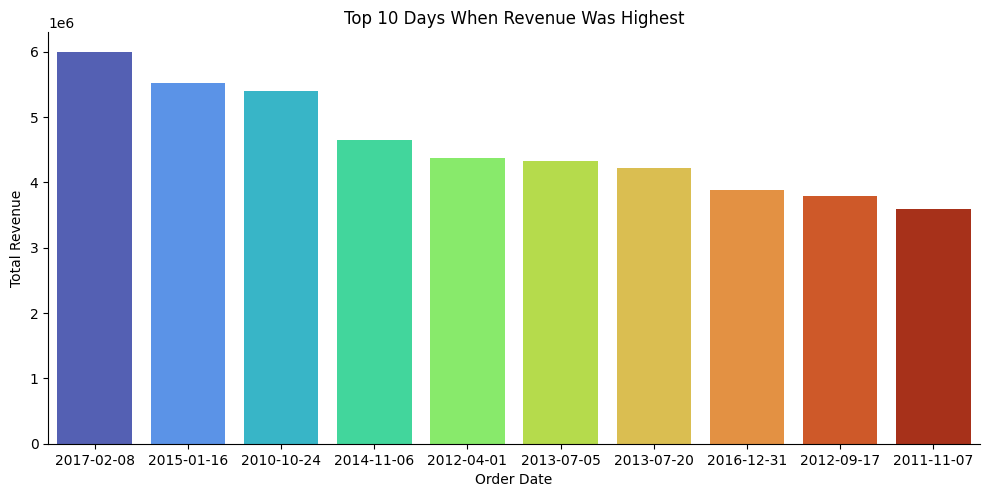

In [18]:
# Plot the top 10 days when Revenue was highest
sns.catplot(y='Total Revenue', x='Order Date', data=top10Revenue, aspect=2, palette='turbo', kind="bar")
pyplot.title('Top 10 Days When Revenue Was Highest')
pyplot.show()

In [19]:
data['Total Profit'] = pd.to_numeric(data['Total Profit'], errors='coerce')
DayProfit = data.copy()
DayProfit['Order Date'] = pd.to_datetime(DayProfit['Order Date']).dt.date

top10Profit = DayProfit.groupby('Order Date')['Total Profit'].sum().sort_values(ascending=False)
top10Profit=top10Profit.reset_index().head(10)

<ipython-input-20-ddf4a46d7762>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='Total Profit', x='Order Date', data=top10Profit, aspect=2, palette='turbo', kind="bar")


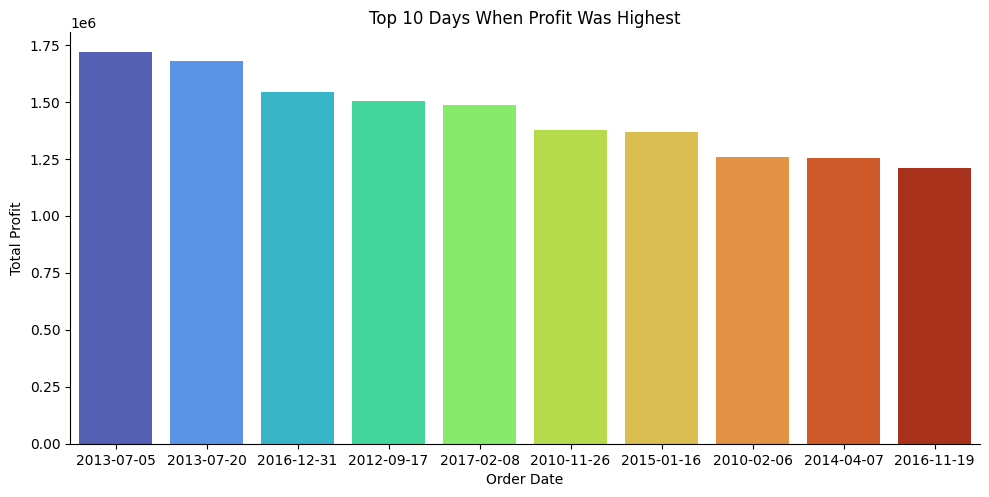

In [20]:
# Plot the top 10 days when profit was highest
sns.catplot(y='Total Profit', x='Order Date', data=top10Profit, aspect=2, palette='turbo', kind="bar")
pyplot.title('Top 10 Days When Profit Was Highest')
pyplot.show()

<ipython-input-21-34e02d213c62>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rev_growth.reset_index(), x='Order Year', y='Total Revenue', palette=color)
<ipython-input-21-34e02d213c62>:7: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=rev_growth.reset_index(), x='Order Year', y='Total Revenue', palette=color)


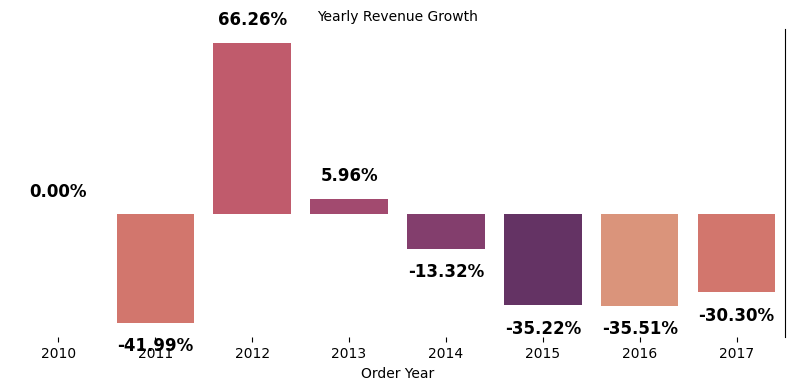

In [21]:
# Yearly Revenue Growth
rev_yearly= data.groupby(data['Order Year'])['Total Revenue'].sum()
rev_growth = (rev_yearly / rev_yearly.iloc[0] - 1) * 100

fig = pyplot.figure(figsize=(10, 4))
color = sns.color_palette('flare')
ax = sns.barplot(data=rev_growth.reset_index(), x='Order Year', y='Total Revenue', palette=color)

for i in ax.containers:
    ax.bar_label(i, padding=10, color='black', fontsize=12, label_type='edge',
                 fontweight='bold', fmt='%.2f%%')

pyplot.title('Yearly Revenue Growth', size=10)

ax.spines[['left', 'top', 'bottom']].set_visible(False)
ax.yaxis.set_visible(False)
pyplot.show()

Text(0.5, 1.0, 'Profit per year')

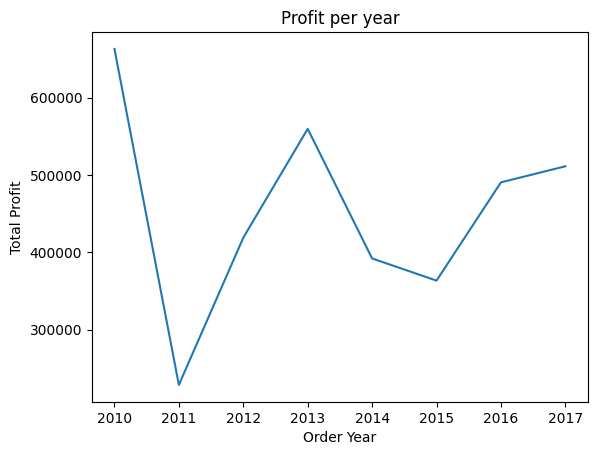

In [22]:
# Line graph of Total Profit and Order Year
data.groupby('Order Year')['Total Profit'].mean().plot()
pyplot.xlabel('Order Year')
pyplot.ylabel('Total Profit')
pyplot.title('Profit per year')

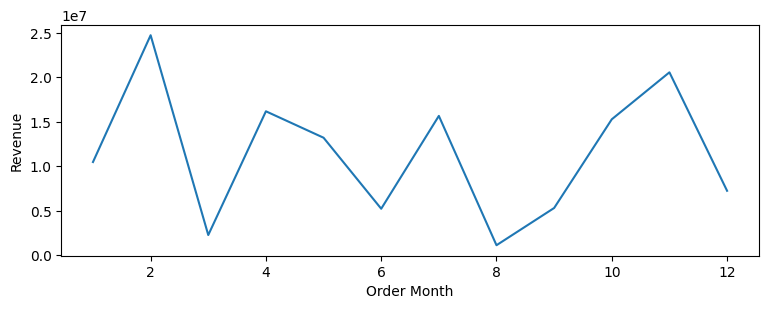

In [23]:
#Line graph of Total Revenue and Order Month
pyplot.figure(figsize = (9,3))
data.groupby(['Order Month'])['Total Revenue'].sum().plot()
pyplot.ylabel('Revenue', size=10)
pyplot.show()

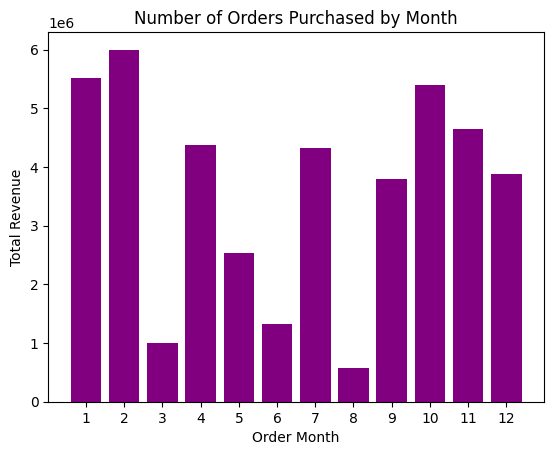

In [24]:
#Bar chart for Total Revenue and Order Month
pyplot.bar(data['Order Month'], data['Total Revenue'],color='purple')

# Set the chart title and axis labels
pyplot.title('Number of Orders Purchased by Month')
pyplot.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
pyplot.xlabel('Order Month')
pyplot.ylabel('Total Revenue')
pyplot.show()

<ipython-input-25-2fe18bed669c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Total Profit', data=High_Profit.head(10), palette='turbo')


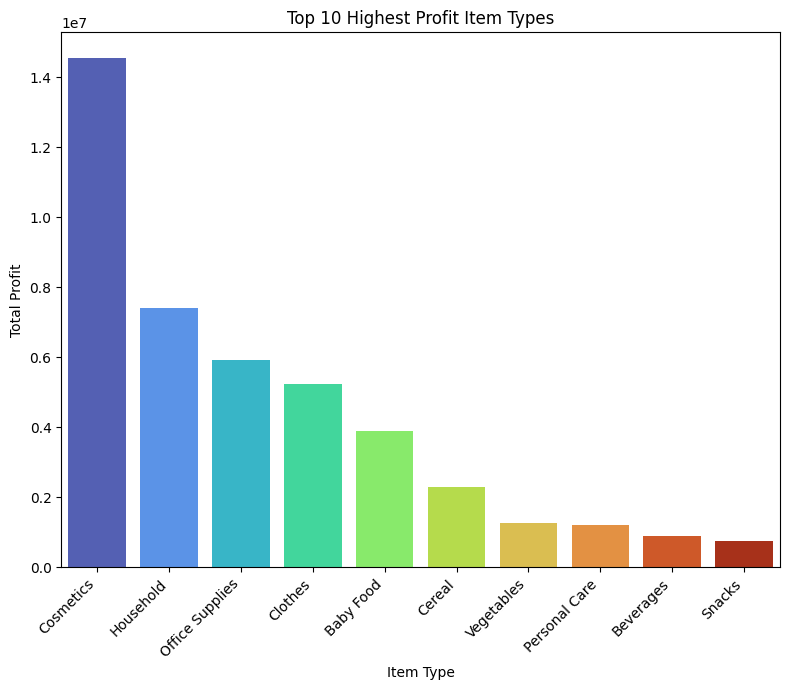

In [25]:
# Visualization of Top 10 Highest Profit Item Types
data['Total Profit'] = pd.to_numeric(data['Total Profit'], errors='coerce')
High_Profit = data.groupby('Item Type')['Total Profit'].sum().reset_index()
High_Profit = High_Profit.sort_values('Total Profit', ascending=False)


pyplot.figure(figsize=(8, 7))
sns.barplot(x='Item Type', y='Total Profit', data=High_Profit.head(10), palette='turbo')
pyplot.xlabel('Item Type')
pyplot.ylabel('Total Profit')
pyplot.title('Top 10 Highest Profit Item Types')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()


<ipython-input-26-1b3c48a90bf6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Total Profit', data=High_Profit.head(10), palette='turbo')


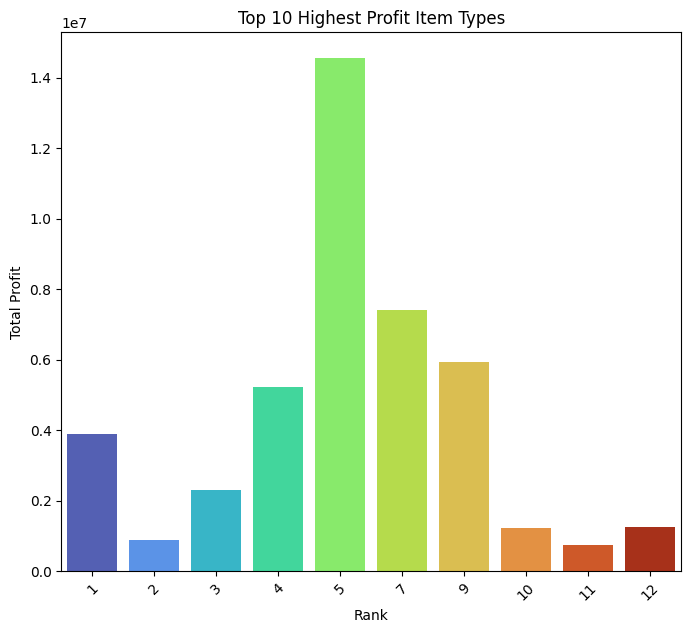

In [26]:
# Visualization of Top 10 Highest Profit Item Types by Rank
High_Profit['Rank'] = High_Profit.index + 1

pyplot.figure(figsize=(8, 7))
sns.barplot(x='Rank', y='Total Profit', data=High_Profit.head(10), palette='turbo')
pyplot.xlabel('Rank')
pyplot.ylabel('Total Profit')
pyplot.title('Top 10 Highest Profit Item Types')
pyplot.xticks(rotation=45)
pyplot.show()

In [27]:
# Display the top 10 highest profit item types along with their ranks and total profits
print(High_Profit[['Rank', 'Item Type', 'Total Profit']].head(10))


    Rank        Item Type  Total Profit
4      5        Cosmetics   14556048.66
6      7        Household    7412605.71
8      9  Office Supplies    5929583.75
3      4          Clothes    5233334.40
0      1        Baby Food    3886643.70
2      3           Cereal    2292443.43
11    12       Vegetables    1265819.63
9     10    Personal Care    1220622.48
1      2        Beverages     888047.28
10    11           Snacks     751944.18


**Observation:**

* Cosmetics occupy a notable position at rank 5, indicating high profitability within the top 10 categories. Conversely, "Snacks" exhibit the lowest profitability among these categories. This highlights the significant contribution of cosmetics products to overall profits and the comparatively weaker performance of snacks.

In [28]:
# Group by 'Item Type' and sum the 'Units Sold' to calculate total quantity sold
total_quantity_sold = data.groupby('Item Type')['Units Sold'].sum().reset_index()
best_selling_products_quantity = total_quantity_sold.sort_values(by='Units Sold', ascending=False)

# Display the top 10 best-selling products by total quantity sold
print("Top 10 Best-Selling Products by Total Quantity Sold:")
print(best_selling_products_quantity.head(10))

Top 10 Best-Selling Products by Total Quantity Sold:
          Item Type  Units Sold
4         Cosmetics       83718
3           Clothes       71260
1         Beverages       56708
5            Fruits       49998
9     Personal Care       48708
8   Office Supplies       46967
6         Household       44727
0         Baby Food       40545
2            Cereal       25877
11       Vegetables       20051


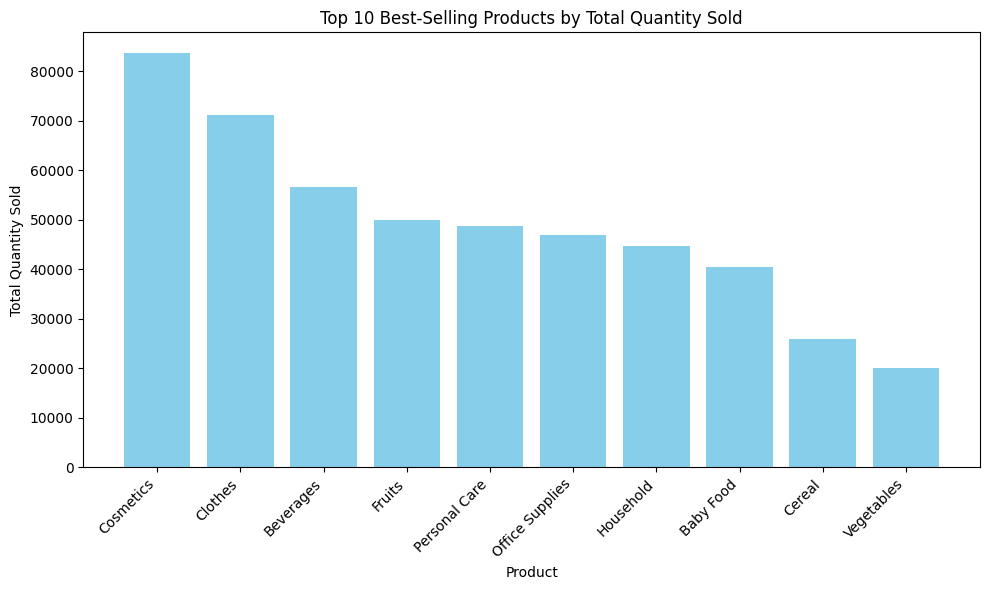

In [29]:
# Plot the top 10 best-selling products by total quantity sold
pyplot.figure(figsize=(10, 6))
pyplot.bar(best_selling_products_quantity['Item Type'].head(10), best_selling_products_quantity['Units Sold'].head(10), color='skyblue')
pyplot.xlabel('Product')
pyplot.ylabel('Total Quantity Sold')
pyplot.title('Top 10 Best-Selling Products by Total Quantity Sold')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()


In [30]:
total_revenue= data.groupby('Item Type')['Total Revenue'].sum().reset_index()
best_selling_products_revenue = total_revenue.sort_values(by='Total Revenue', ascending=False)

# Display the top 10 best-selling products by total revenue generated
print("\nTop 10 Best-Selling Products by Total Revenue Generated:")
print(best_selling_products_revenue.head(10))


Top 10 Best-Selling Products by Total Revenue Generated:
          Item Type  Total Revenue
4         Cosmetics    36601509.60
8   Office Supplies    30585380.07
6         Household    29889712.29
0         Baby Food    10350327.60
3           Clothes     7787292.80
2            Cereal     5322898.90
7              Meat     4503675.75
9     Personal Care     3980904.84
11       Vegetables     3089057.06
1         Beverages     2690794.60


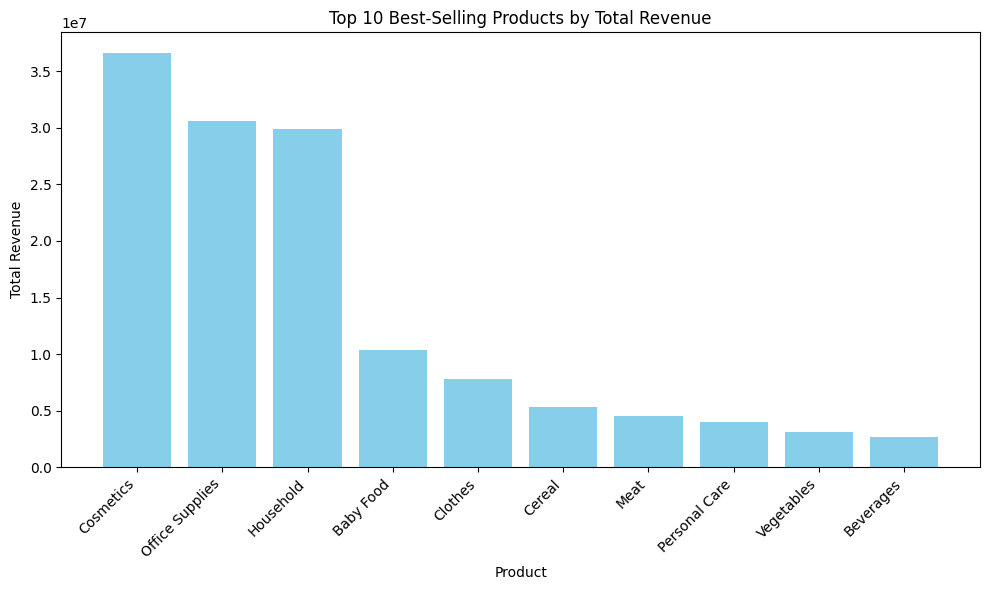

In [31]:
# Plot the top 10 best-selling products by total revenue
pyplot.figure(figsize=(10, 6))
pyplot.bar(best_selling_products_revenue['Item Type'].head(10), best_selling_products_revenue['Total Revenue'].head(10), color='skyblue')
pyplot.xlabel('Product')
pyplot.ylabel('Total Revenue')
pyplot.title('Top 10 Best-Selling Products by Total Revenue')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

In [32]:
# Plot top 10 countries by total profit
profit_by_country = data.groupby('Country')['Total Profit'].sum().reset_index()
profit_by_country = profit_by_country.sort_values(by='Total Profit', ascending=False)

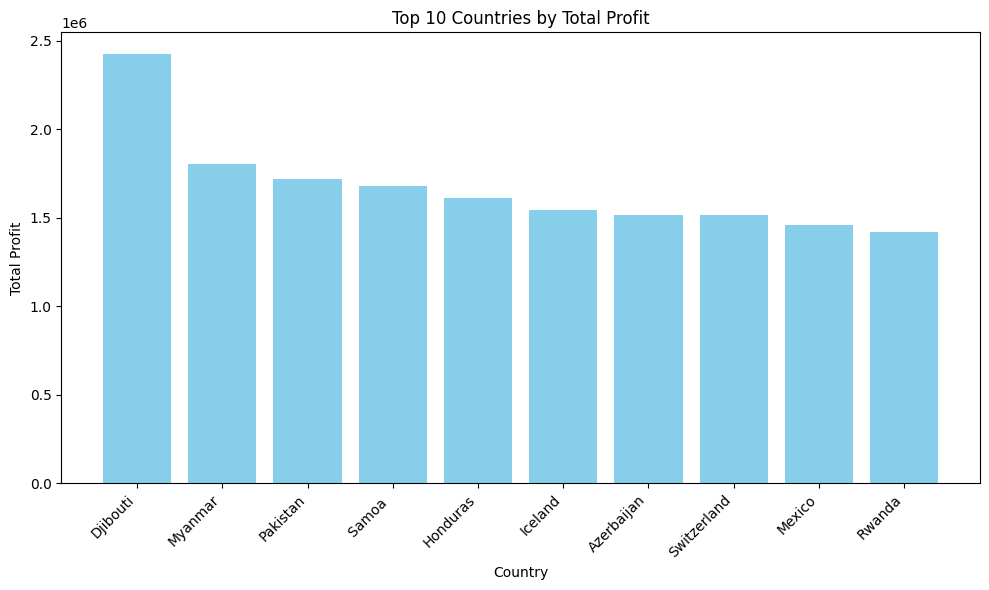

In [33]:
pyplot.figure(figsize=(10, 6))
pyplot.bar(profit_by_country['Country'].head(10), profit_by_country['Total Profit'].head(10), color='skyblue')
pyplot.xlabel('Country')
pyplot.ylabel('Total Profit')
pyplot.title('Top 10 Countries by Total Profit')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

In [34]:
# Plot top 10 countries by total revenue
revenue_by_country = data.groupby('Country')['Total Revenue'].sum().reset_index()
revenue_by_country = revenue_by_country.sort_values(by='Total Revenue', ascending=False)


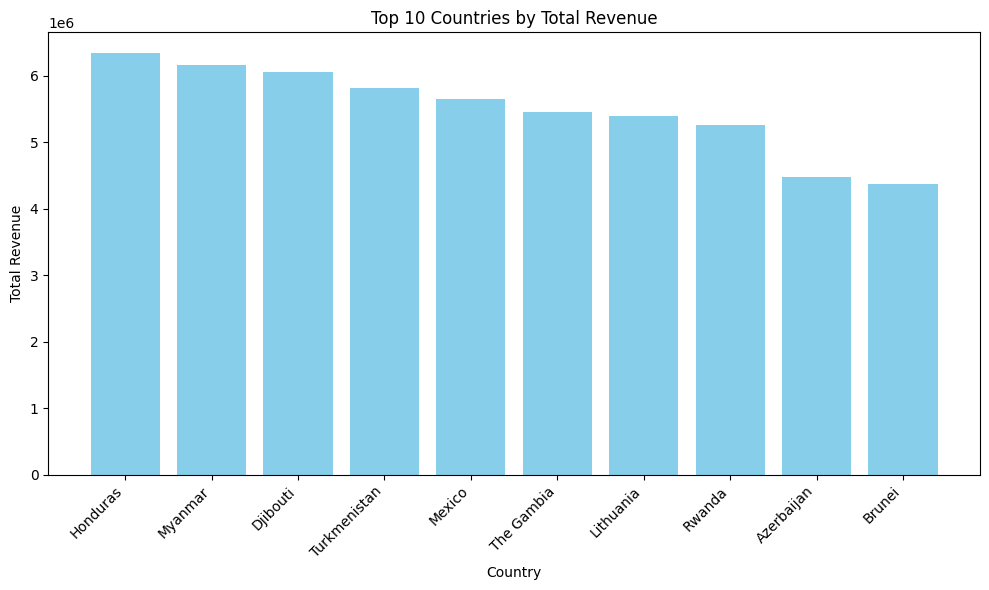

In [35]:
pyplot.figure(figsize=(10, 6))
pyplot.bar(revenue_by_country['Country'].head(10), revenue_by_country['Total Revenue'].head(10), color='skyblue')
pyplot.xlabel('Country')
pyplot.ylabel('Total Revenue')
pyplot.title('Top 10 Countries by Total Revenue')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

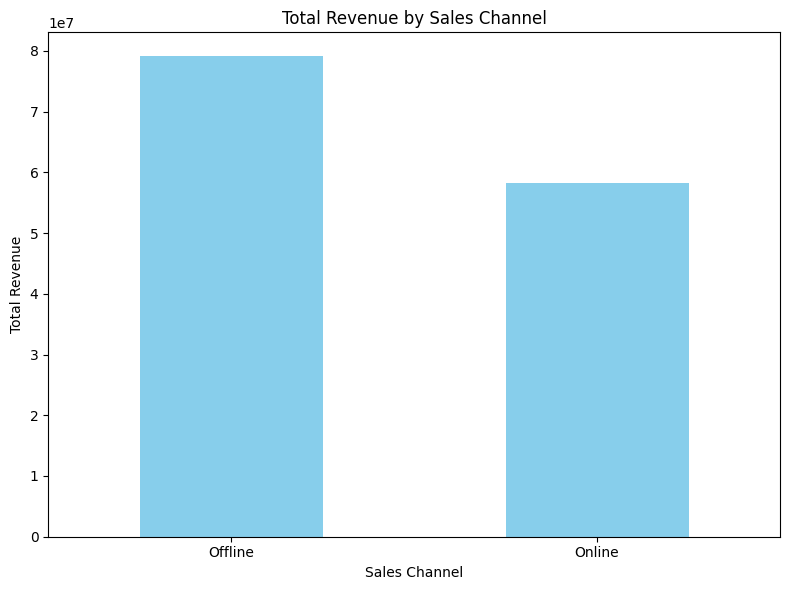

In [36]:
#Total revenue by sales channel

channel_revenue = data.groupby('Sales Channel')['Total Revenue'].sum()
pyplot.figure(figsize=(8, 6))
channel_revenue.plot(kind='bar', color='skyblue')
pyplot.xlabel('Sales Channel')
pyplot.ylabel('Total Revenue')
pyplot.title('Total Revenue by Sales Channel')
pyplot.xticks(rotation=0)
pyplot.tight_layout()
pyplot.show()


**Observation:**

* Offline Sales Dominance: Offline sales consistently contribute more to total revenue compared to online sales, indicating the dominance of offline channels in revenue generation.

* Opportunity in Offline: The superiority of offline sales suggests focusing efforts on enhancing offline channels to capitalize on revenue opportunities and drive business success.

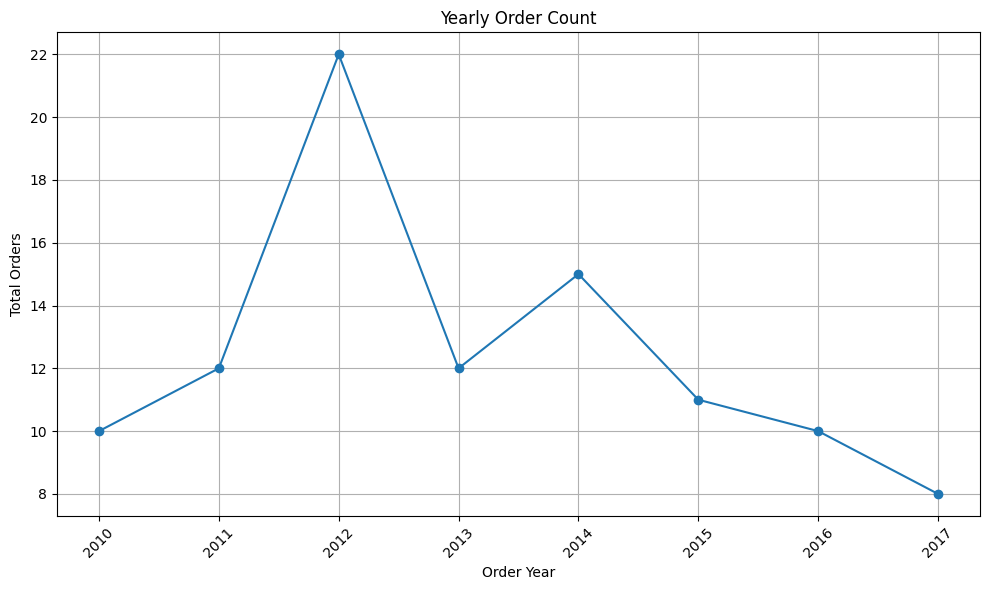

In [37]:
#Yearly Order Count
yearly_orders = data.groupby('Order Year').size().reset_index(name='Total Orders')

pyplot.figure(figsize=(10, 6))
pyplot.plot(yearly_orders['Order Year'], yearly_orders['Total Orders'], marker='o')
pyplot.title('Yearly Order Count')
pyplot.xlabel('Order Year')
pyplot.ylabel('Total Orders')
pyplot.xticks(rotation=45)
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()


**Observation:**


* Yearly Trend: The plot shows the total number of orders on a yearly basis. It is evident that there is a variation in the number of orders across different years.

* Peak Year: The year 2012 stands out as having the highest number of orders compared to other years, indicating a peak in sales activity during that period.

* Lower Activity in 2017: The year 2017 shows a notable decrease in the total number of orders compared to previous years, indicating a decrease in sales activity during that period.



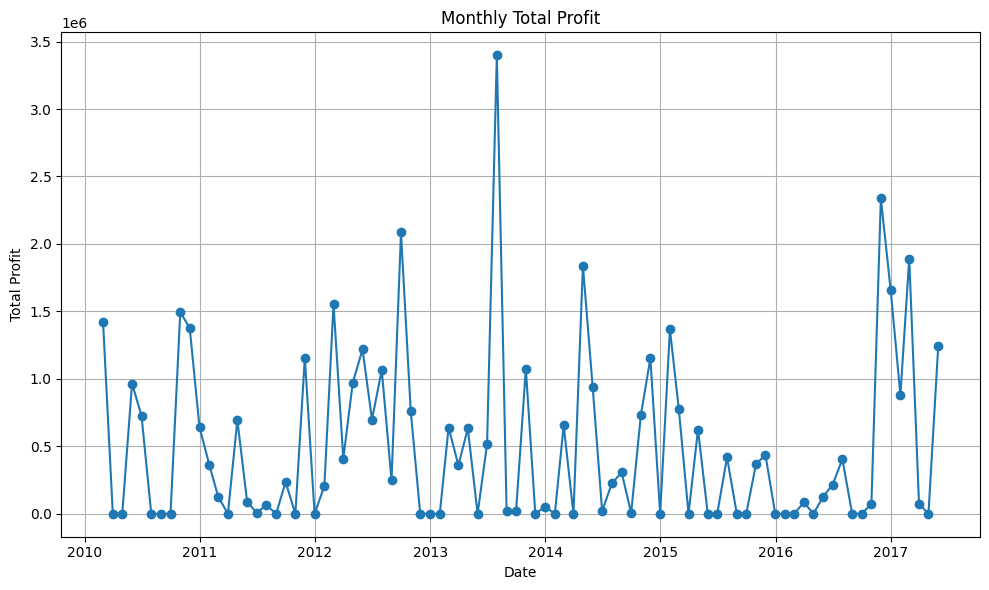

In [38]:
#Monthly Total Profit Analysis
data['Order Date'] = pd.to_datetime(data['Order Date'])
monthly_profit = data.resample('M', on='Order Date')['Total Profit'].sum()

# Plotting
pyplot.figure(figsize=(10, 6))
pyplot.plot(monthly_profit, marker='o', linestyle='-')
pyplot.title('Monthly Total Profit')
pyplot.xlabel('Date')
pyplot.ylabel('Total Profit')
pyplot.grid(True)
pyplot.tight_layout()
pyplot.show()
